In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
cars = sns.load_dataset('mpg')

In [19]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: count, dtype: int64

In [21]:
cars.groupby('origin').cylinders.value_counts().unstack()

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,63.0,3.0,4.0,NaN
japan,4.0,69.0,NaN,6.0,NaN
usa,NaN,72.0,NaN,74.0,103.0


In [22]:
# some missing values are there to fill them we will use fillna
origin_cycle = cars.groupby('origin').cylinders.value_counts().unstack().fillna(0)
origin_cycle

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


<Axes: xlabel='cylinders', ylabel='origin'>

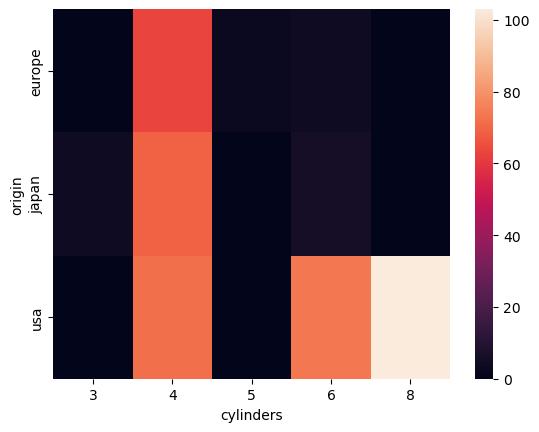

In [23]:
sns.heatmap(origin_cycle)

In [24]:
test_array = np.array([[1,2],[3,4]])

<Axes: >

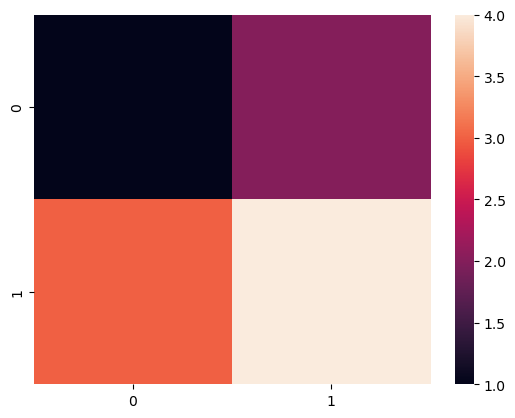

In [25]:
sns.heatmap(test_array)

# transpose

In [26]:
origin_cycle.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


<Axes: xlabel='origin', ylabel='cylinders'>

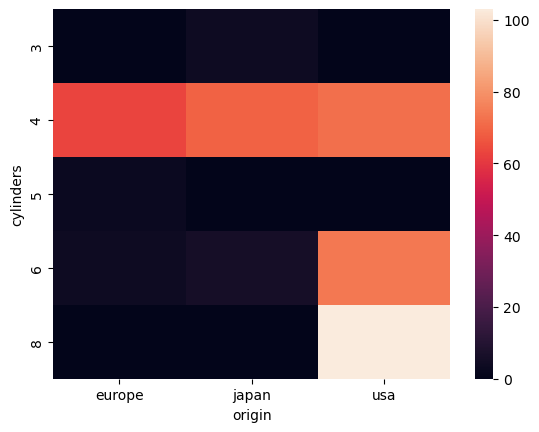

In [27]:
sns.heatmap(origin_cycle.T)

# Correlation

In [32]:
cars1 = cars.select_dtypes(include=['int','float'])
cars1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

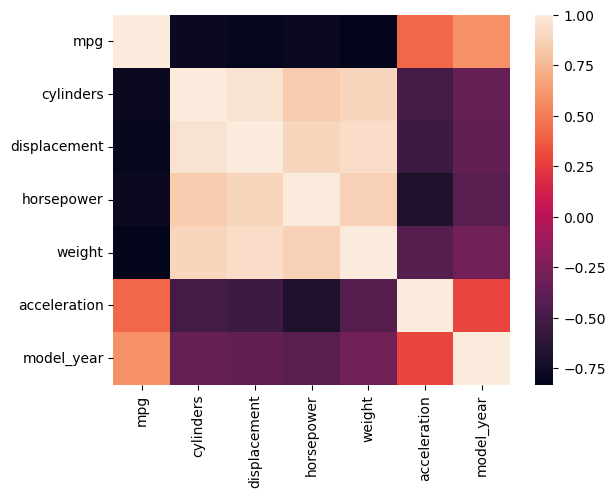

In [33]:
sns.heatmap(cars1.corr())

## Color Palette

<Axes: xlabel='cylinders', ylabel='origin'>

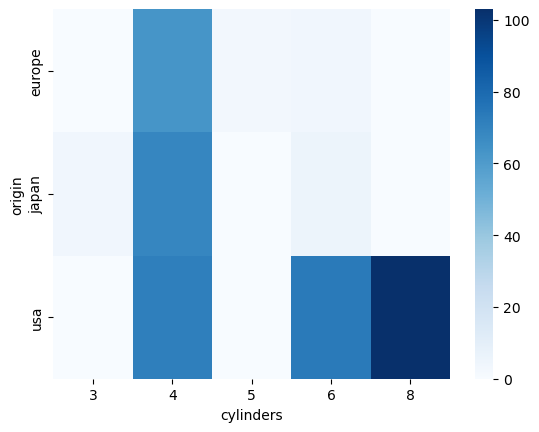

In [35]:
sns.heatmap(origin_cycle,cmap='Blues')  # here the darker one will give high correlation

<Axes: >

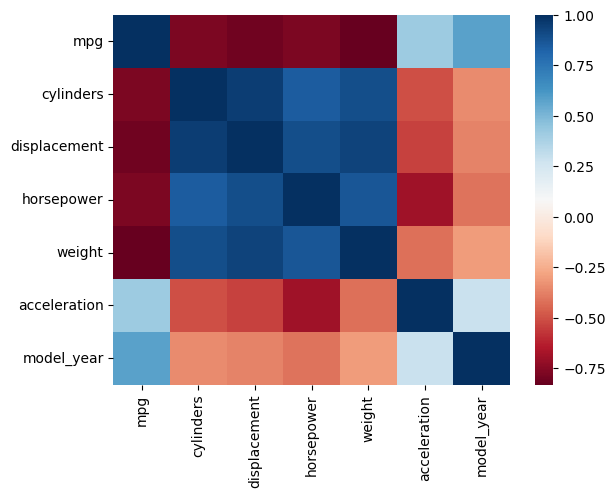

In [36]:
# DIVEGING PAlette

sns.heatmap(cars1.corr(),cmap='RdBu')

### Controlling the color bar range: center,vmax,vmin

<Axes: >

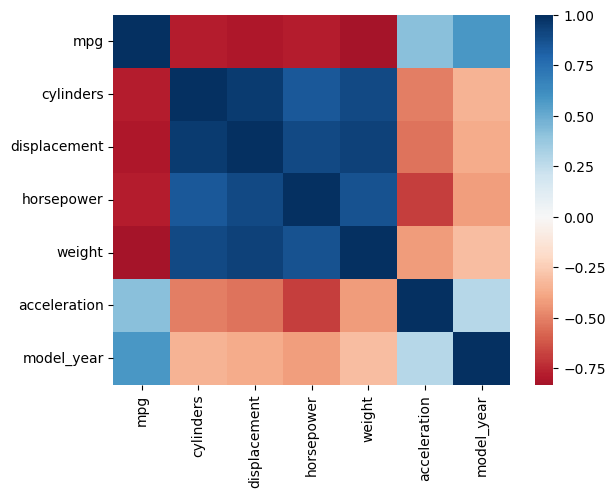

In [38]:
sns.heatmap(cars1.corr(),cmap='RdBu',center=0)

<Axes: >

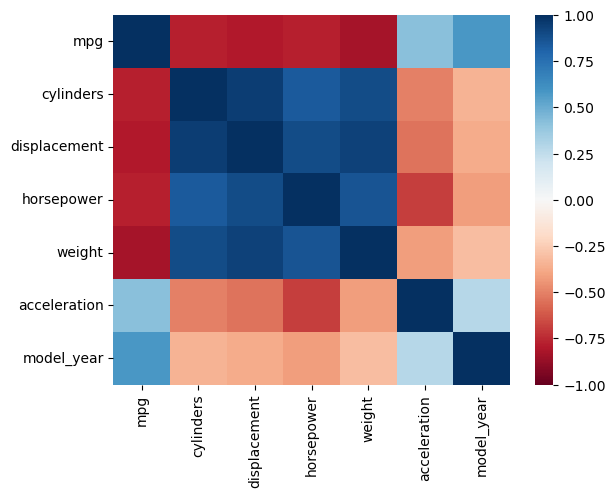

In [39]:
sns.heatmap(cars1.corr(),cmap='RdBu',vmin=-1,vmax=1)

## Annotations

<Axes: xlabel='cylinders', ylabel='origin'>

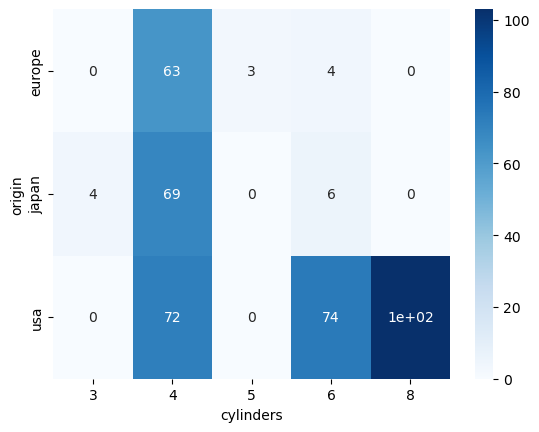

In [40]:
sns.heatmap(origin_cycle,cmap='Blues',annot= True)

<Axes: xlabel='cylinders', ylabel='origin'>

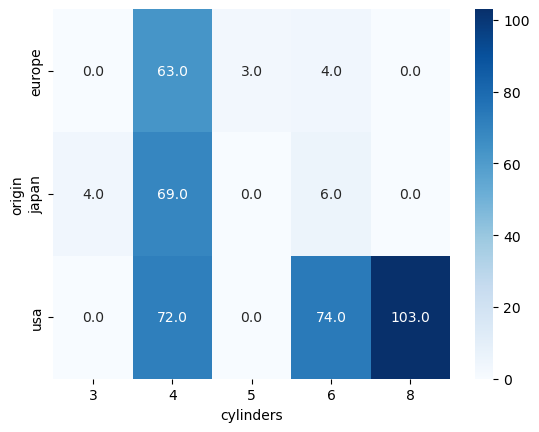

In [42]:
# fmt  ='0.1f' for one decimal places
sns.heatmap(origin_cycle,cmap='Blues',annot=True,fmt='0.1f')

# annot_kws

<Axes: xlabel='cylinders', ylabel='origin'>

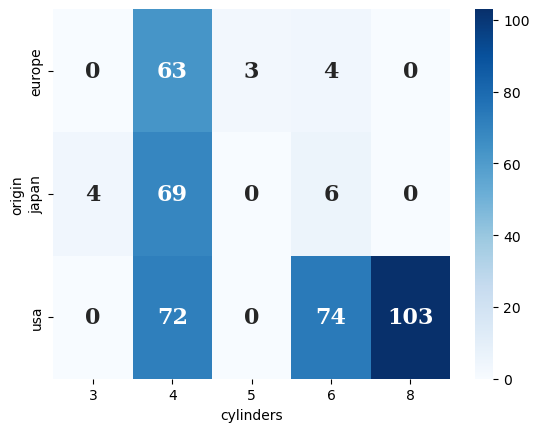

In [43]:
sns.heatmap(origin_cycle,cmap='Blues',annot=True,fmt='.0f',annot_kws={'fontsize':16, 'fontweight':'bold','fontfamily':'serif'})

## styling

<Axes: >

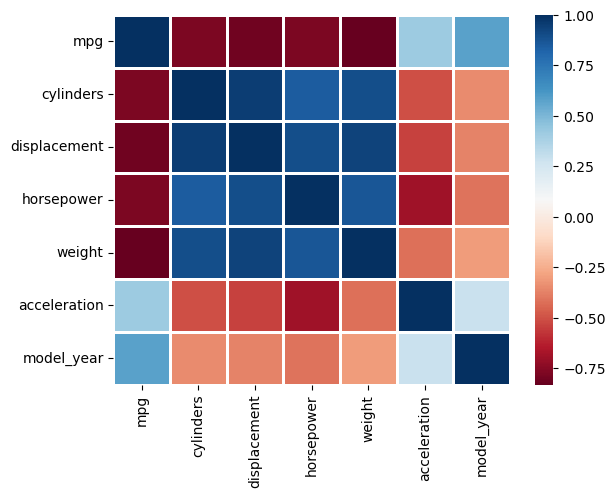

In [45]:
sns.heatmap(cars1.corr(),cmap='RdBu',linewidth=1)

<Axes: >

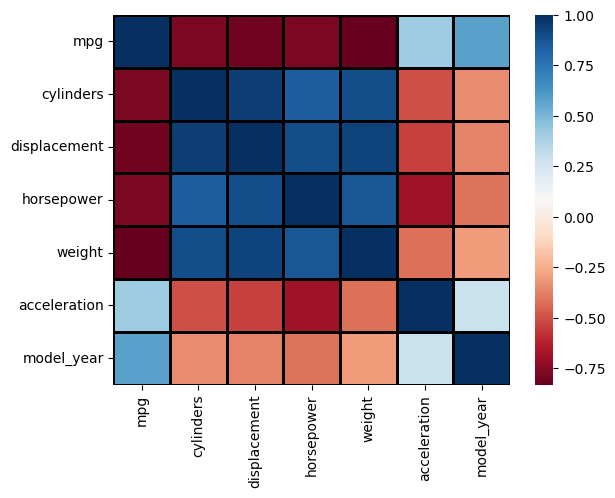

In [46]:
sns.heatmap(cars1.corr(),cmap='RdBu',linewidth=1,linecolor ='black')

In [47]:
# If we want to give labels as per our convenience

In [48]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year'
         ]


<Axes: >

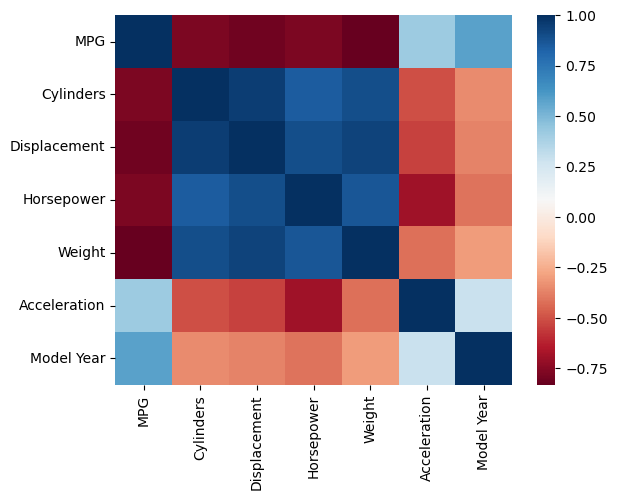

In [50]:
sns.heatmap(cars1.corr(),cmap='RdBu',xticklabels=labels, yticklabels=labels)

<Axes: >

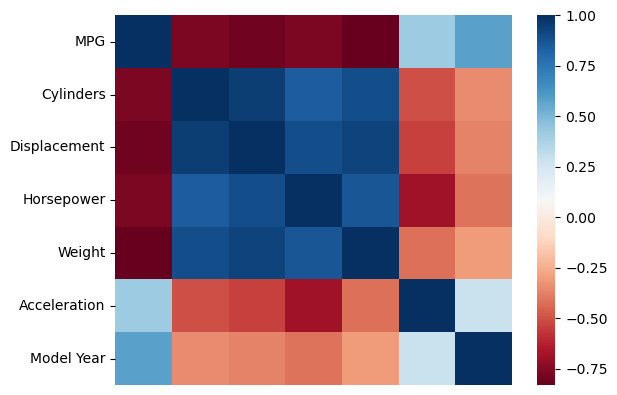

In [51]:
sns.heatmap(cars1.corr(),cmap='RdBu',xticklabels=False,yticklabels=labels)

# PAIRPLOT

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tips  = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
sns.set_style('darkgrid')

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


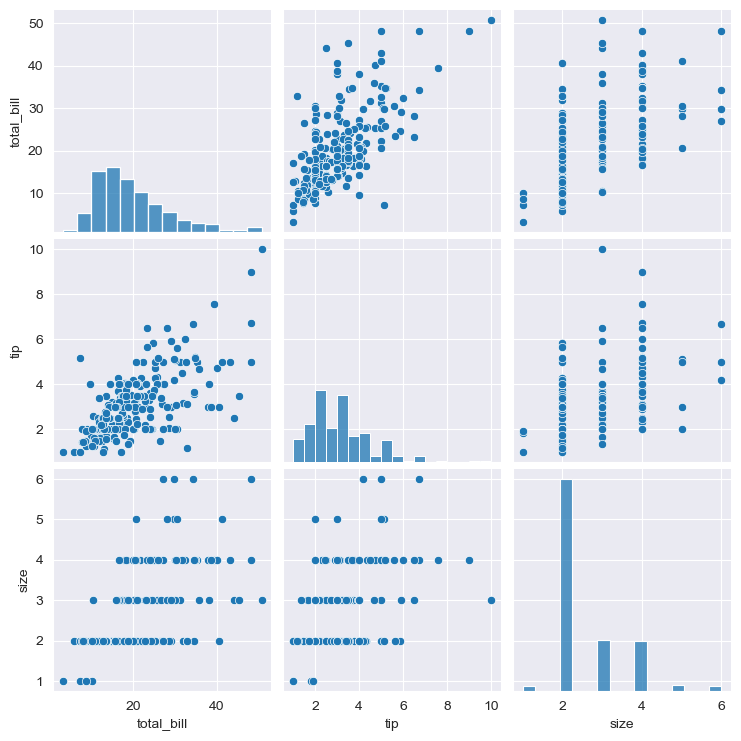

In [6]:
sns.pairplot(tips)

In [7]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [9]:
# Note that the axes tick labels correspond to the bivariate,relational plot and NOT the ralational plot ie histogram


C:\Users\Aditya\AppData\Local\Temp\ipykernel_25464\2339777210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['size'],kde=False,hist_kws={'alpha':1})


<Axes: xlabel='size'>

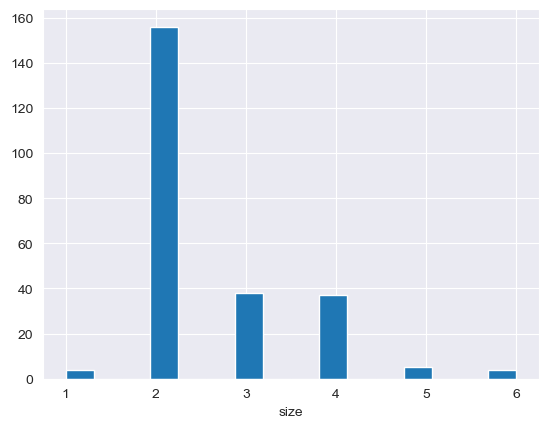

In [13]:
sns.distplot(tips['size'],kde=False,hist_kws={'alpha':1})

## pLOT KINDS

#### diag_kind

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


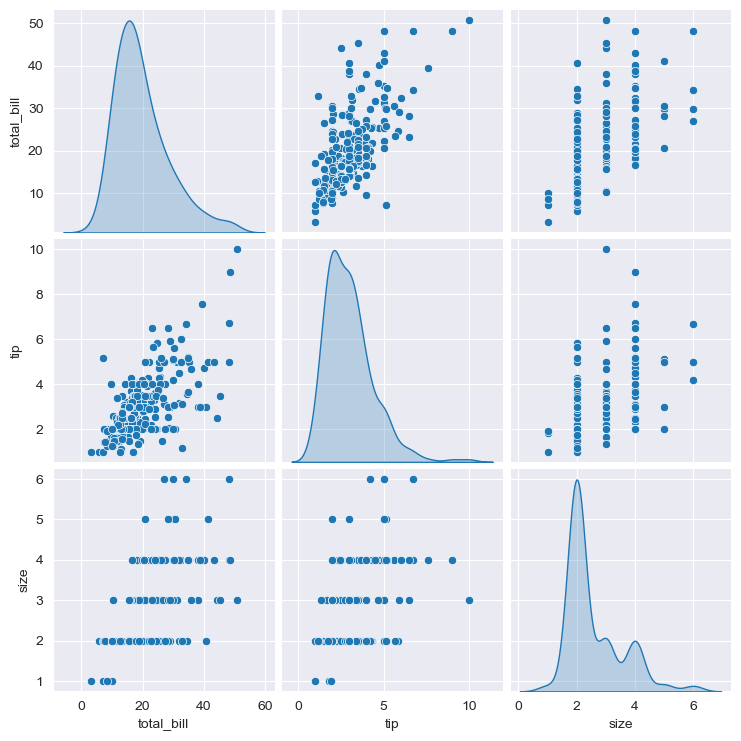

In [15]:
sns.pairplot(tips, diag_kind='kde')

In [16]:
# DIAG PLOT MEANS FOR UNIVARIATE LIKE HISTOGRAM

In [17]:
#KIND

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


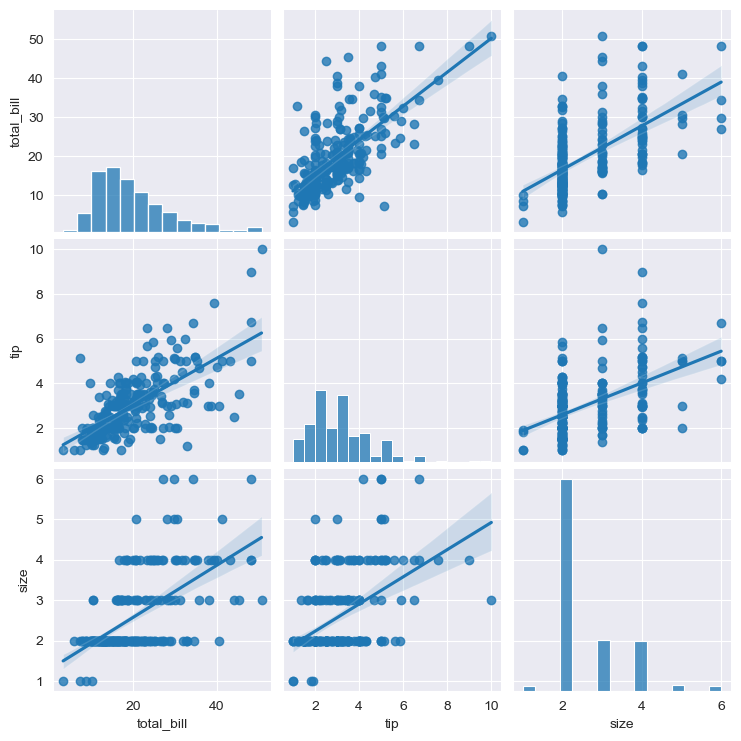

In [18]:
sns.pairplot(tips,kind='reg')

# Returns Pairgrid

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


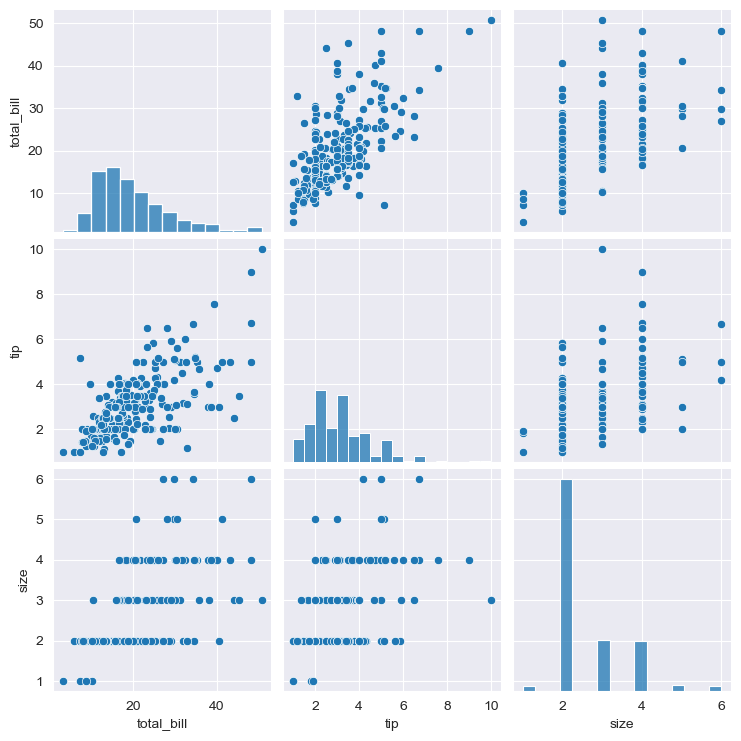

In [20]:
g=sns.pairplot(tips)

In [21]:
type(g)

seaborn.axisgrid.PairGrid

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


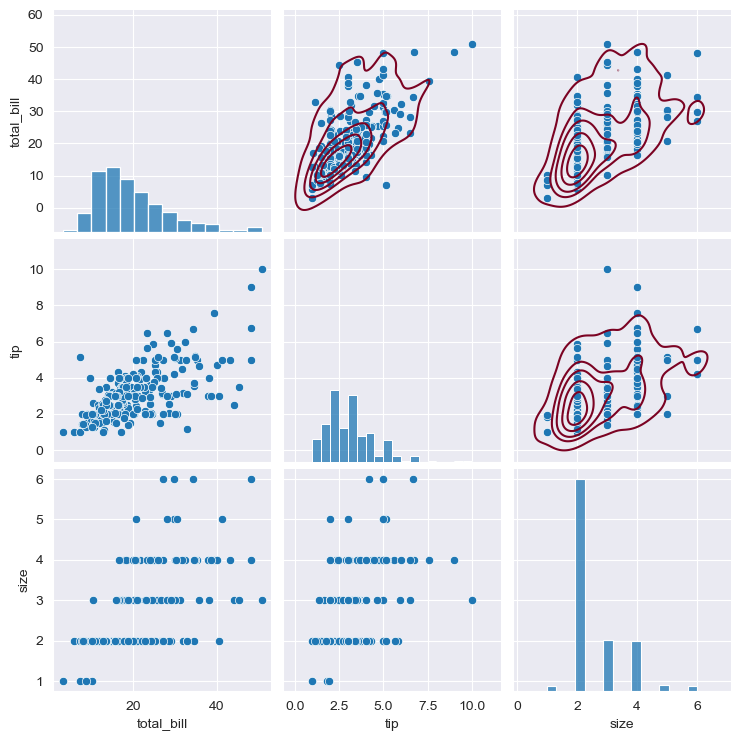

In [23]:
g = sns.pairplot(tips)
g.map_upper(sns.kdeplot,n_levels=6,color='xkcd:wine red')

## Categorical and Specific Variables

In [24]:
tips['weekend']=tips.day.isin(['Sat','Sun'])

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


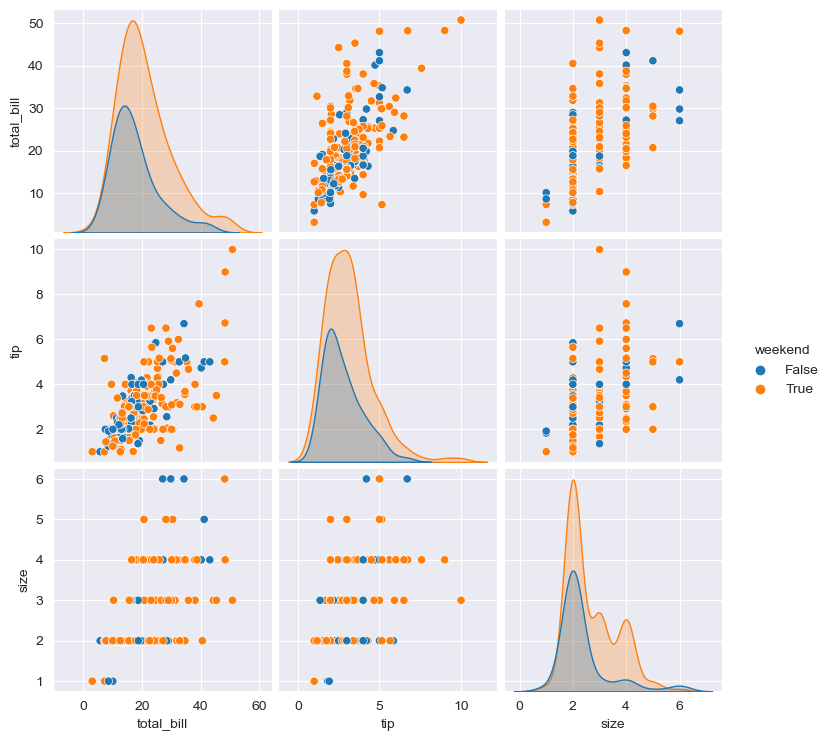

In [26]:
sns.pairplot(tips,hue='weekend')

## vars,x_vars,y_vars

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


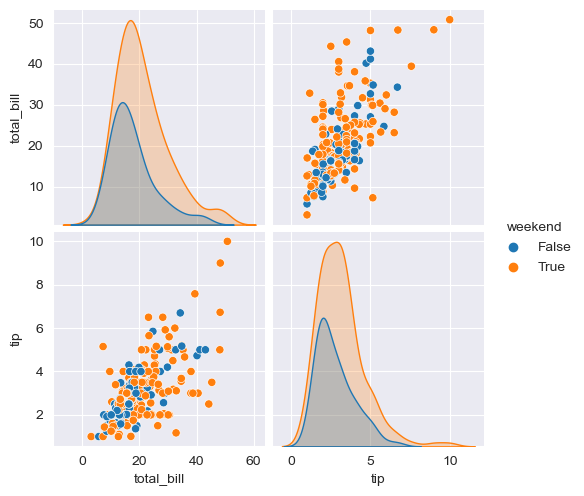

In [27]:
sns.pairplot(tips,hue='weekend',vars=['total_bill','tip'])

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


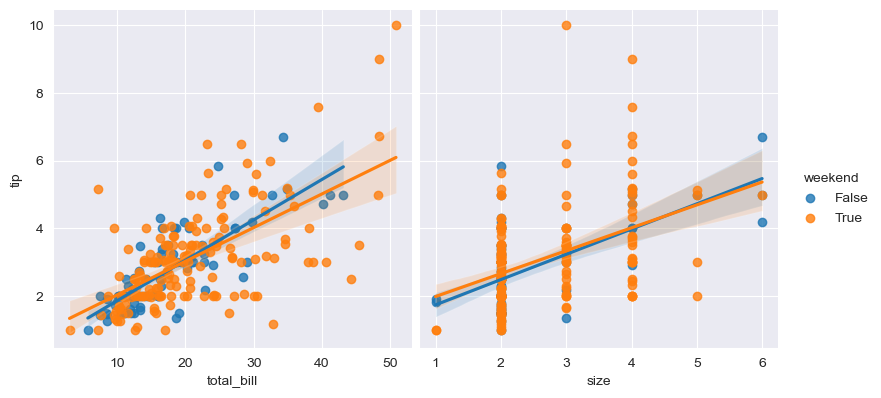

In [29]:
sns.pairplot(tips,hue='weekend',y_vars=['tip'],x_vars=['total_bill','size'],height=4,kind='reg')

## Styling

In [30]:
del tips['weekend']

## height and aspect

In [31]:
from ipywidgets import interactive
def size_widget(height=2.5,aspect=1):
    sns.pairplot(tips,height=height,aspect=aspect)

In [33]:
interactive(size_widget,height=(1,3.5,0.5), aspect=(0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


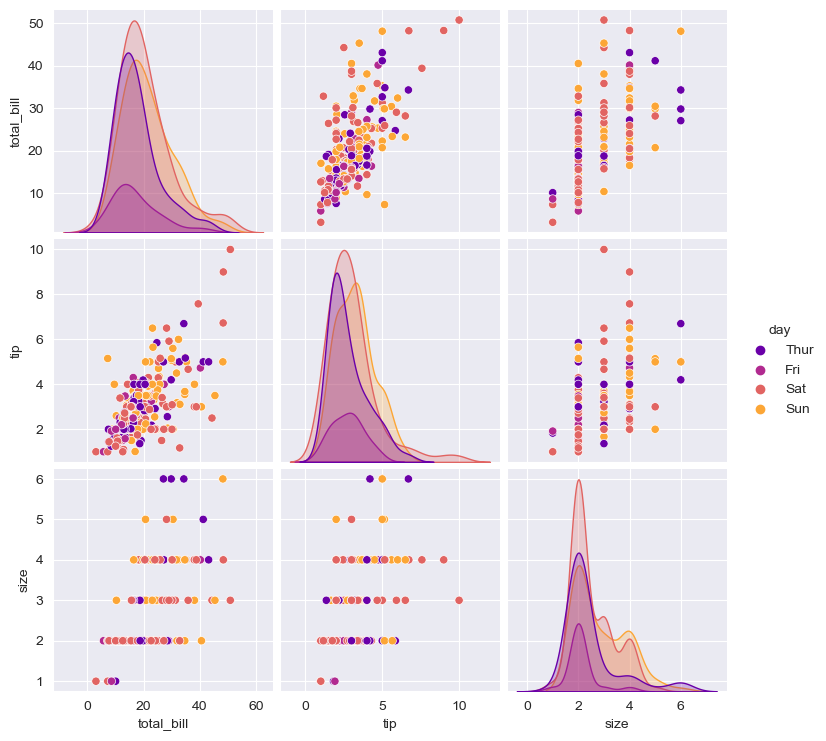

In [34]:
sns.pairplot(tips,hue='day',palette='plasma')

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


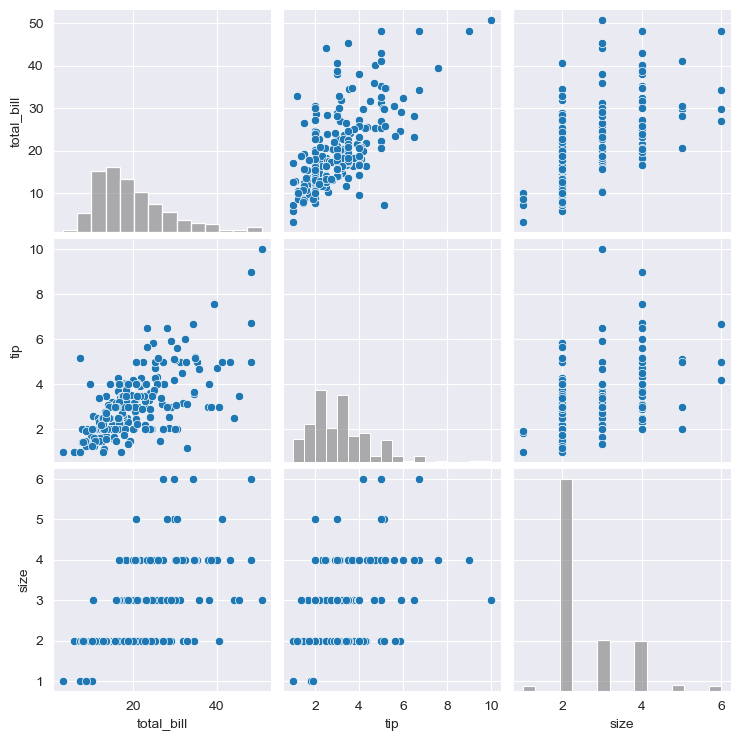

In [35]:
sns.pairplot(tips, diag_kws={'color':'gray','alpha':0.6})

C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


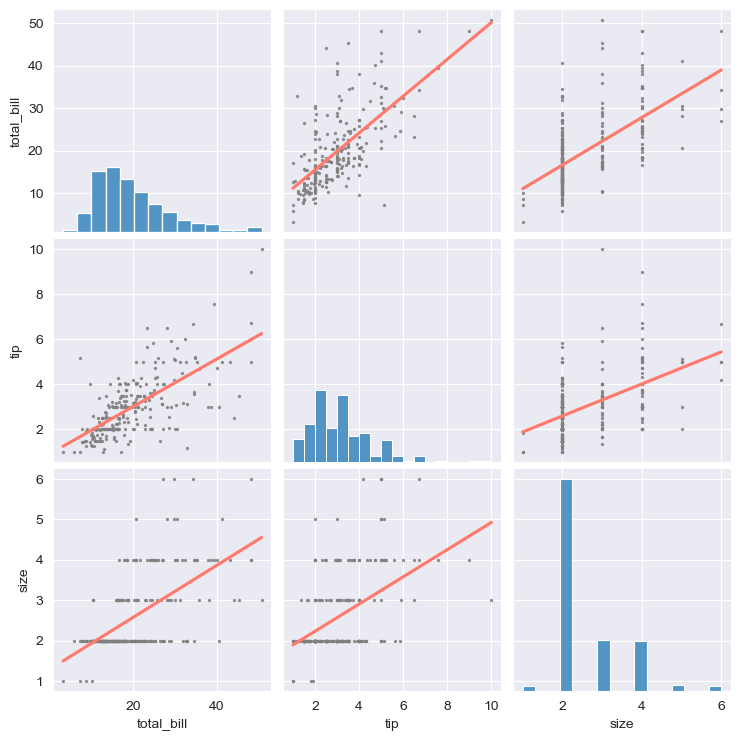

In [36]:
sns.pairplot(tips,kind='reg',plot_kws={'ci':None,'color':'xkcd:salmon','scatter_kws':{'color':'gray','s':2}})